In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv('pluto.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859212 entries, 0 to 859211
Data columns (total 45 columns):
Unnamed: 0      859212 non-null int64
Unnamed: 0.1    859212 non-null int64
CD              859212 non-null int64
CT2010          855138 non-null float64
SchoolDist      856441 non-null float64
Council         856209 non-null float64
ZipCode         855058 non-null float64
FireComp        859212 non-null object
PolicePrct      856260 non-null float64
Address         858700 non-null object
BldgClass       858725 non-null object
LandUse         859212 non-null float64
OwnerType       108557 non-null object
LotArea         859212 non-null int64
BldgArea        859212 non-null int64
ComArea         859212 non-null int64
ResArea         859212 non-null int64
OfficeArea      859212 non-null int64
RetailArea      859212 non-null int64
GarageArea      859212 non-null int64
StrgeArea       859212 non-null int64
FactryArea      859212 non-null int64
OtherArea       859212 non-null int64

In [22]:
features = pd.DataFrame(df['dv'])
target = df['has_lit']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9369613689395904

In [25]:
f1_score(lr.predict(X_train),y_train)

0.019912931312479846

In [26]:
f1_score(lr.predict(X_val),y_val)

0.022560078469838155

Predicts well, but only because there are so few housing litigations. When looking at the F1 scores, can see it still doesn't perform very well.

In [27]:
lr_b = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_b.fit(X_train,y_train)
f1_score(lr_b.predict(X_train),y_train)

0.32480460456997284

In [28]:
f1_score(lr_b.predict(X_val),y_val)

0.3238921001926782

With class weights balanced, performs much better and overfits less.

Text(0.5,0,'False Positive Rate')

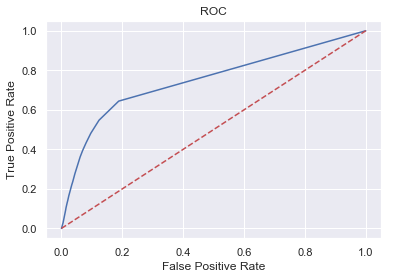

In [45]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
sns.set()

fpr, tpr, _ = roc_curve(y_val, lr_b.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [43]:
roc_auc_score(y_val,lr_b.predict(X_val))

0.6759455896170747

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
f1_score(rf.predict(X_train),y_train)

0.0029379669268865946

In [32]:
f1_score(rf.predict(X_val),y_val)

0.0008566044200788076

In [33]:
rf_b = RandomForestClassifier(class_weight='balanced')
rf_b.fit(X_train,y_train)
f1_score(rf_b.predict(X_train),y_train)

0.28503007351303183

In [34]:
f1_score(rf_b.predict(X_val),y_val)

0.28418730267412223

Performs about the same as logistic regression.

Text(0.5,0,'False Positive Rate')

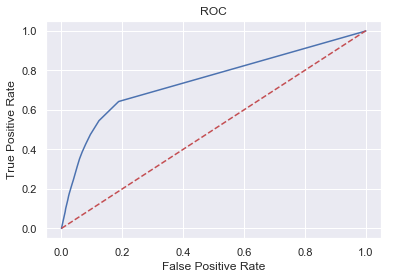

In [46]:
fpr, tpr, _ = roc_curve(y_val, rf_b.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [47]:
roc_auc_score(y_val,rf_b.predict(X_val))

0.7268583897338013

In [35]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
f1_score(gbm.predict(X_train),y_train)

0.0009248749316853744

In [36]:
f1_score(gbm.predict(X_val),y_val)

0.0005147563486616336

In [37]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train,y_train)
f1_score(xg.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [38]:
f1_score(xg.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

Gradient-boosted modelling does not perform very well with this data at all.